In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
from utils import display_examples, DataGenerator, angle_error,get_filenames

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
street_view_dir = os.path.join('..', 'data', r'mit_dataset')

if os.path.exists(street_view_dir):
    test_filenames = get_filenames(street_view_dir)[1]
else:
    test_examples_path = os.path.join('..', 'data', 'test_examples')
    test_filenames = [
        os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)
    ]

In [3]:
import keras.backend as K
def combined_loss(y_true, y_pred):
    categorical_loss = K.categorical_crossentropy(y_true, y_pred)
    angle_loss = angle_error(y_true, y_pred)  # Assuming angle_error is defined appropriately
    total_loss = categorical_loss + angle_loss
    return total_loss

In [3]:
model_location = os.path.join('..', 'models', 'rotnet_indoor_resnet50.keras')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

In [ ]:
batch_size = 64
out = model.evaluate_generator(
    DataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func=None,
        crop_center=True,
        crop_largest_rect=False,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3940\1925212531.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  out = model.evaluate_generator(


Test loss: 0.5628860592842102
Test angle error: 15.291668891906738


1/1 [==============================] - 0s 22ms/step
[23 18  2 22 17] [5 5 5 5 5]
[60, 35, -15, 55, 30] [-30, -30, -30, -30, -30]


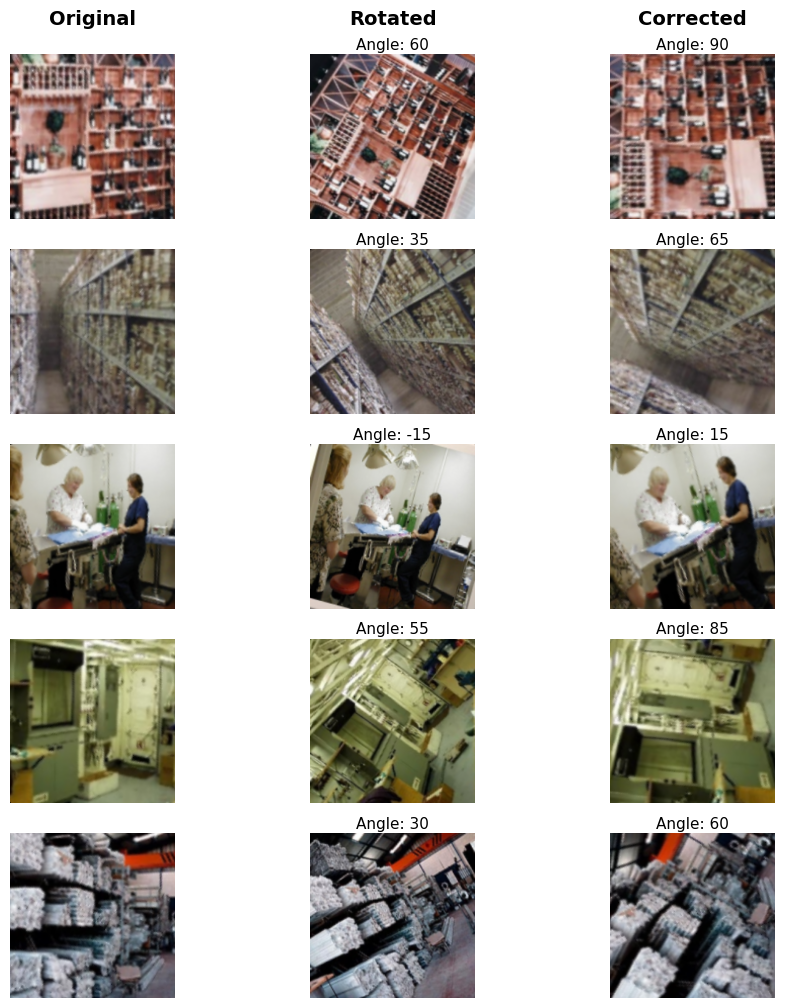

In [10]:
num_images = 5

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)